In [120]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("./flavors_of_cocoa.csv")

In [121]:
df

,Id,Company,Bean Origin,Review Date,Cocoa Percent,Company Location,Rating
0,1,A. Morin,Agua Grande,2016.0,63%,France,3.75
1,2,A. Morin,Kpime,2015.0,70%,France,2.75
2,3,A. Morin,Atsane,2015.0,70%,France,3.00
3,4,A. Morin,Akata,2015.0,70%,France,3.50
4,5,A. Morin,Quilla,2015.0,70%,France,3.50
...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,2011.0,70%,Austria,3.75
1791,1792,Zotter,Congo,2011.0,65%,Austria,3.00
1792,1793,Zotter,Kerala State,2011.0,65%,Austria,3.50
1793,1794,Zotter,Kerala State,2011.0,62%,Austria,3.25


In [122]:
df.loc[df["Bean Origin"]=="Kerala State"]


,Id,Company,Bean Origin,Review Date,Cocoa Percent,Company Location,Rating
1792,1793,Zotter,Kerala State,2011.0,65%,Austria,3.50
1793,1794,Zotter,Kerala State,2011.0,62%,Austria,3.25


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1795 non-null   int64  
 1   Company           1795 non-null   object 
 2   Bean Origin       1795 non-null   object 
 3   Review Date       1791 non-null   float64
 4   Cocoa Percent     1795 non-null   object 
 5   Company Location  1795 non-null   object 
 6   Rating            1795 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 98.3+ KB


In [124]:
df.describe()

,Id,Review Date,Rating
count,1795.000000,1791.000000,1795.000000
mean,898.000000,2012.321608,3.185933
std,518.316184,2.928835,0.478062
min,1.000000,2006.000000,1.000000
25%,449.500000,2010.000000,2.875000
50%,898.000000,2013.000000,3.250000
75%,1346.500000,2015.000000,3.500000
max,1795.000000,2017.000000,5.000000


C:\Users\aryan\AppData\Local\Temp\ipykernel_16184\1624017118.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ratings_by_bin, labels=labels)


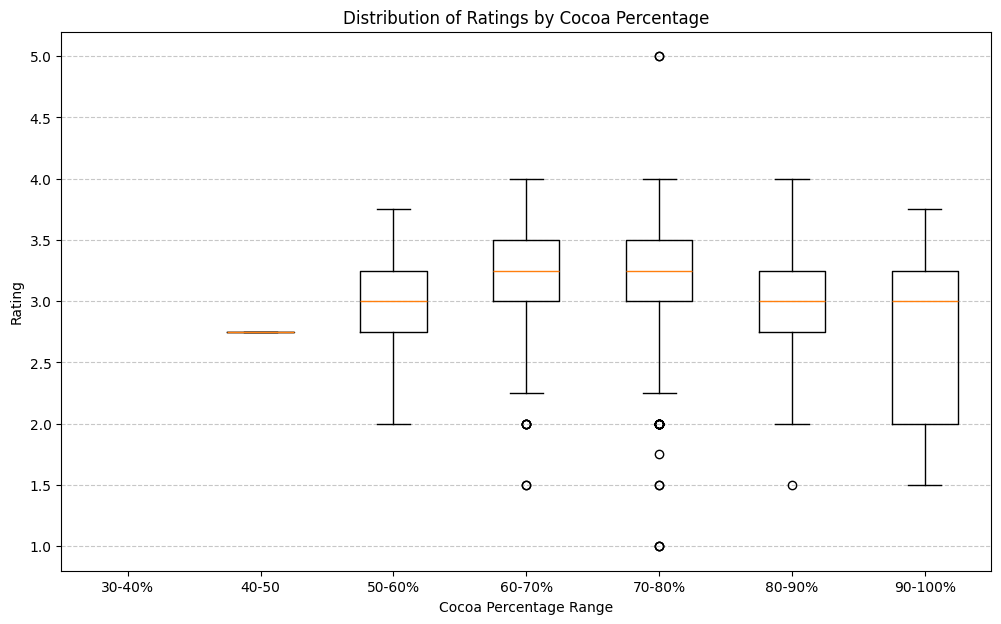

In [125]:

df["Cocoa Percent"]=pd.to_numeric(df["Cocoa Percent"].str.replace("%",""))
df.dropna(subset=['Cocoa Percent', 'Rating'], inplace=True)

# 2. Bin the 'Cocoa Percent' data into categories
# We create bins for ranges like 40-50, 50-60, 60-70, etc.
bins = [30,40, 50, 60, 70, 80, 90, 100]
labels = [ '30-40%','40-50','50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
df['Cocoa Percent Bin'] = pd.cut(df['Cocoa Percent'], bins=bins, labels=labels, right=False)
df['Cocoa Percent Bin']
# 3. Prepare the data for the boxplot
# We create a list where each item is a Series of ratings for a specific cocoa bin
ratings_by_bin = [
    df[df['Cocoa Percent Bin'] == label]['Rating'] for label in labels
]

# 4. Create the boxplot
plt.figure(figsize=(12, 7))
plt.boxplot(ratings_by_bin, labels=labels)

# 5. Customize the plot
plt.title('Distribution of Ratings by Cocoa Percentage')
plt.xlabel('Cocoa Percentage Range')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 6. Save and show the plot
